In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math #Will help with the Sqrt formula for UCB
import random #Used in case of Thompson Sampling
#Import the csv file by putting in the correct path
df = pd.read_csv(r'C:\Users\sambajaj0\Desktop\Datawarehouse_report\DWH_report.csv')

In [31]:
#You may want to clean up irrelevant columns from the dataset before implementation
Num_Rows = 20000 #no. of rows
Num_Col = len(df.columns) #no. of columns
Num_Rows

20000

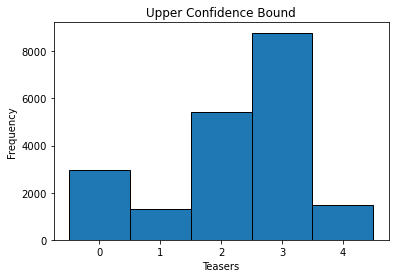

In [32]:
#Upper Confidence Bound
Teaser_UCB = []
numbers_of_selections = [0] * Num_Col
sums_of_rewards = [0] * Num_Col
total_reward = 0
for n in range(0, Num_Rows):
  ts = 0
  max_upper_bound = 0
  for i in range(0, Num_Col):
    if (numbers_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ts = i
  Teaser_UCB.append(ts)
  numbers_of_selections[ts] += 1
  reward = df.values[n, ts]
  sums_of_rewards[ts] = sums_of_rewards[ts] + reward
  total_reward = total_reward + reward

#Visualization
x = list(df)
plt.hist(Teaser_UCB, align = ('mid'),bins=np.arange(-1,5)+0.5, ec="k")
plt.title('Upper Confidence Bound')
plt.xlabel('Teasers')
plt.ylabel('Frequency')
plt.locator_params(axis='x', integer=True)
plt.show()

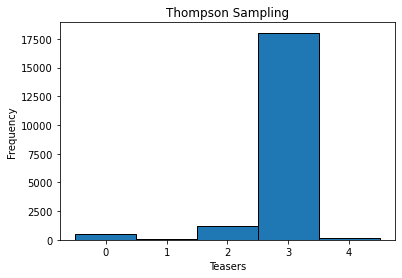

In [33]:
#Thompson Sampling
Teaser_TH = []
numbers_of_rewards_1 = [0] * Num_Col
numbers_of_rewards_0 = [0] * Num_Col
total_reward = 0
for n in range(0, Num_Rows):
  ts = 0
  max_random = 0
  for i in range(0, Num_Col):
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
    if (random_beta > max_random):
      max_random = random_beta
      ts = i
  Teaser_TH.append(ts)
  reward = df.values[n, ts]
  if reward == 1:
    numbers_of_rewards_1[ts] += 1
  else:
    numbers_of_rewards_0[ts] += 1
  total_reward = total_reward + reward

#Visualization
x1 = list(df)
plt.hist(Teaser_TH, align = ('mid'),bins=np.arange(-1,5)+0.5, ec="k")
plt.title('Thompson Sampling')
plt.xlabel('Teasers')
plt.ylabel('Frequency')
plt.locator_params(axis='x', integer=True)
plt.show()

<BarContainer object of 5 artists>

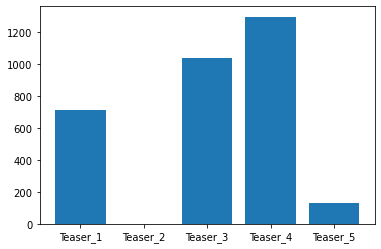

In [34]:
#Overall
plt.bar(x= list(df), height= df.iloc[:Num_Rows].sum())